# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../data/Employee.csv')
employees.head(5)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
pd.pivot_table(employees,columns='Department',values='Salary',aggfunc='mean')

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


In [4]:
# Method 2
# your code here
employees2 = employees.groupby('Department')['Salary'].mean().reset_index()
employees2

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [6]:
# your code here
pd.pivot_table(employees,columns=['Title','Department'],values='Salary',aggfunc='mean')

Title         VP       analyst       associate      
Department    HR    IT      HR    IT        IT Sales
Salary      70.0  70.0    32.5  32.5      60.0  55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [7]:
# your code here
pd.pivot_table(employees,columns='Title',values=['Salary'],aggfunc='sum',index='Years')

Salary                  
Title     VP analyst associate
Years                         
1        NaN    35.0       NaN
2        NaN    60.0      55.0
3        NaN     NaN      55.0
4        NaN    35.0       NaN
7        NaN     NaN      60.0
8      140.0     NaN       NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [8]:
# your code here
pd.pivot_table(employees,columns=['Department','Title'],values='Salary',aggfunc=['mean','count'])


mean                                           count             \
Department    HR            IT                       Sales    HR         IT   
Title         VP analyst    VP analyst associate associate    VP analyst VP   
Salary      70.0    32.5  70.0    32.5      60.0      55.0     1       2  1   

                                        
Department                       Sales  
Title      analyst associate associate  
Salary           2         1         2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your code here
pd.pivot_table(employees,columns=['Department','Title'],values='Salary',aggfunc=['median','max','min','mean',np.std])
#paolo: could you check if you get NaNs here? In the current visualizations not all columns are visible

median                                           max              \
Department     HR            IT                       Sales  HR          IT   
Title          VP analyst    VP analyst associate associate  VP analyst  VP   
Salary       70.0    32.5  70.0    32.5      60.0      55.0  70      35  70   

                    ...       min  mean                                  \
Department          ...     Sales    HR            IT                     
Title      analyst  ... associate    VP analyst    VP analyst associate   
Salary          35  ...        55  70.0    32.5  70.0    32.5      60.0   

                           std                      
Department     Sales        HR        IT     Sales  
Title      associate   analyst   analyst associate  
Salary          55.0  3.535534  3.535534       0.0  

[1 rows x 27 columns]

In [10]:
"""
your commments here
"""
#paolo: by checking previous output you may find NaNs that you have to tackle in the comments below

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
# your code here
#paolo: why did you choose to replace with zero? 

employees.fillna(0)
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
# your code here
# your code here
pd.pivot_table(employees,columns=['Department'],values='Salary',aggfunc=['sum','count'])

sum            count         
Department   HR   IT Sales    HR IT Sales
Salary      135  195   110     3  4     2

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [13]:
# your code here
pd.pivot_table(employees,columns=['Department','Title'],values=['Years','Salary'],aggfunc=['sum','mean']).T

Salary  Years
     Department Title                   
sum  HR         VP           70.0    8.0
                analyst      65.0    6.0
     IT         VP           70.0    8.0
                analyst      65.0    3.0
                associate    60.0    7.0
     Sales      associate   110.0    5.0
mean HR         VP           70.0    8.0
                analyst      32.5    3.0
     IT         VP           70.0    8.0
                analyst      32.5    1.5
                associate    60.0    7.0
     Sales      associate    55.0    2.5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [14]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [15]:
# your code here
def remove_max_bydepartment(df):
    df2 = pd.DataFrame()
    for key,row in employees.iterrows():
        if row.Salary < df[df['Department']==row.Department]['Salary'].max():
            c = row
            df2 = df2.append(c,ignore_index=False)
    return df2

df_withoutmax =  remove_max_bydepartment(employees)
df_withoutmax

,Department,Education,Gender,Name,Salary,Title,Years
0,IT,Bachelor,M,Jose,35.0,analyst,1.0
1,IT,Master,F,Maria,30.0,analyst,2.0
2,HR,Master,M,David,30.0,analyst,2.0
3,HR,Bachelor,F,Sonia,35.0,analyst,4.0
7,IT,Phd,M,Pedro,60.0,associate,7.0


In [16]:
#paolo: ok- notice that the question is about the mean salary per department, 
# here you show a different summary

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [17]:
# your code here
fitbit = pd.read_csv('../data/fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [18]:
# your code here
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [19]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [20]:
# your code here
fitbit[['Steps','Minutes Very Active']].corr(method='pearson')

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [21]:
import matplotlib.pyplot as plt;

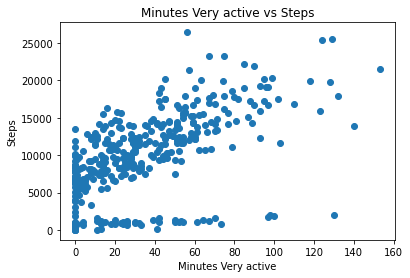

In [22]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""

plt.scatter(fitbit['Minutes Very Active'].to_list(),fitbit['Steps'].to_list())
plt.title('Minutes Very active vs Steps')
plt.xlabel('Minutes Very active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [23]:
"""
your commments here
#Lukas: There is a positive relation between Minutes very active and the number of steps  
"""
#paolo:yes

'\nyour commments here\n#Lukas: There is a positive relation between Minutes very active and the number of steps  \n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [24]:
# your code here
fitbit[['Steps','Minutes Sedentary']].corr(method='pearson')

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

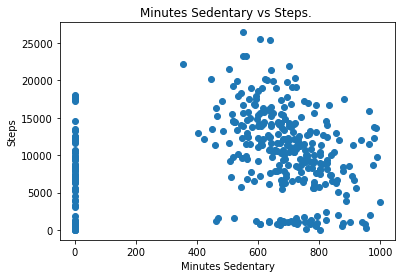

In [25]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'].to_list(),fitbit['Steps'].to_list())
plt.title('Minutes Sedentary vs Steps. ')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [26]:
"""
your commments here
There seems to be a very small positive correlation beteen minutes Sedentary and Steps. 
Maybe it is because people tend to rest longer when when they do longer higher hickes 

However when I see the scatterplot I see. I conclude that the variables are not correlated

"""

'\nyour commments here\nThere seems to be a very small positive correlation beteen minutes Sedentary and Steps. \nMaybe it is because people tend to rest longer when when they do longer higher hickes \n\nHowever when I see the scatterplot I see. I conclude that the variables are not correlated\n\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [27]:
# your code here
fitbit[['Steps','MinutesOfSleep']].corr(method='pearson')

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

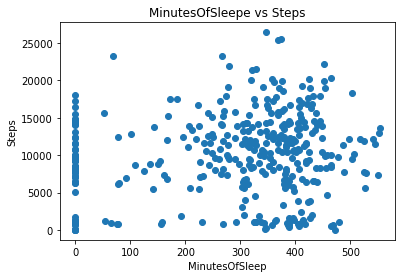

In [28]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'].to_list(),fitbit['Steps'].to_list())
plt.title('MinutesOfSleepe vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [29]:
"""
your commments here
I would say that there is no correlation between minutes of sleep and the number of steps 
"""

'\nyour commments here\nI would say that there is no correlation between minutes of sleep and the number of steps \n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [30]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [31]:
# your code here
cor_fit = fitbit[columns]
cor_fit.head(5)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [32]:
# your code here
cor_fit.corr(method='pearson')['Steps'].sort_values(ascending=False)

### Minutes very active has the highest correlation score vs number of steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [33]:
# your code here
time_grades = pd.read_csv('../data/time_grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

In [34]:
# your code here
time_grades[['Study time','Grade']].value_counts()

Study time  Grade
20          9        1
18          9        1
13          8        1
12          7        1
11          7        1
10          7        1
9           7        1
8           9        1
7           8        1
            3        1
6           5        1
5           3        1
4           4        1
3           2        1
2           1        1
dtype: int64

In [35]:
#paolo: what about a plot?

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [36]:
# your code here
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [37]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [38]:
"""
your commments here
Seems that the pearson correlation test is a bit more conservative than the spearman test. 
pearson test outcome is lower than spearman 

"""



'\nyour commments here\nSeems that the pearson correlation test is a bit more conservative than the spearman test. \npearson test outcome is lower than spearman \n\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

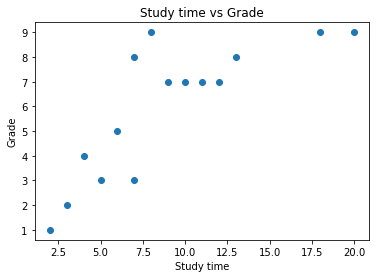

In [39]:
# your code here
plt.scatter(time_grades['Study time'].to_list(),time_grades['Grade'].to_list())
plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [40]:
"""
your commments here
It seems that Study time is positively correlated with Grades

"""

'\nyour commments here\nIt seems that Study time is positively correlated with Grades\n\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [41]:
"""
your commments here
 Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.
"""

'\nyour commments here\n Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.\n'

In [ ]:
#paolo: great lab